In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import copy
import matplotlib.colors
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

In [2]:
s01_umap = np.load("../Embeddings/s01_umap.npy")
s01_tsne = np.load("../Embeddings/s01_tsne.npy")
s01_pca = np.load("../Embeddings/s01_pca.npy")
s01_2layer = np.load("../Embeddings/s01_2layer.npy")
s01_6layer = np.load("../Embeddings/s01_6layer.npy")
s01_vae = np.load("../Embeddings/s01_vae.npy")
PopData = pd.read_csv("../SamusikData/population_assignments01.csv")
Assignments = np.array(PopData.Population)

In [3]:
s01_labels = PopData["Population"].to_numpy()
non_zero = np.where(s01_labels > 0)
s01_pca = s01_pca[non_zero]
s01_umap = s01_umap[non_zero]
s01_tsne = s01_tsne[non_zero]
s01_2layer = s01_2layer[non_zero]
s01_6layer = s01_6layer[non_zero]
s01_vae = s01_vae[non_zero]
y = Assignments[non_zero]

In [4]:
np.random.seed(1)

In [5]:
def run_crossval(X, y):
    cv = StratifiedKFold(n_splits=5)  

    accs = []
    mean_fpr = np.linspace(0, 1, 100)

    classifier = RandomForestClassifier(random_state=1234)
    for i, (train, test) in enumerate(cv.split(X, y)):
        X_train = np.array(X[train])
        X_test = np.array(X[test])
        y_train = np.array(y[train])
        y_test = np.array(y[test])

        classifier.fit(X_train, y_train)
        acc = metrics.accuracy_score(y_test, classifier.predict(X_test))
        print("Fold " + str(i+1) + ": " + str(acc))
        accs.append(acc)
    print("Mean Accuracy: " + str(np.mean(accs)))
    print("Accuracy SD: " + str(np.std(accs)))
    return np.mean(accs), np.std(accs)

### PCA Accuracy

In [6]:
X_pca = s01_pca[:,0:2]

In [7]:
mean_accs_pca, std_accs_pca = run_crossval(X_pca, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.6166431593794076
Fold 2: 0.6126939351198871
Fold 3: 0.609779031499765
Fold 4: 0.6096482979123566
Fold 5: 0.6110588677825841
Mean Accuracy: 0.6119646583388001
Accuracy SD: 0.00258391808874942


### UMAP Accuracy

In [8]:
X_umap = s01_umap[:,0:2]

In [9]:
mean_accs_umap, std_accs_umap = run_crossval(X_umap, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.9505406676069582
Fold 2: 0.94950634696756
Fold 3: 0.9479078514339445
Fold 4: 0.949125446680459
Fold 5: 0.9520406244122626
Mean Accuracy: 0.9498241874202368
Accuracy SD: 0.0013919440782392426


### tSNE Accuracy

In [10]:
X_tsne = s01_tsne[:,0:2]

In [11]:
mean_accs_tsne, std_accs_tsne = run_crossval(X_tsne, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.9515749882463563
Fold 2: 0.9511988716502116
Fold 3: 0.9493182886694875
Fold 4: 0.9486552567237164
Fold 5: 0.951006206507429
Mean Accuracy: 0.9503507223594401
Accuracy SD: 0.0011478995335513084


### 2 Layer AE Accuracy

In [12]:
X_2layer = s01_2layer[:,0:2]

In [13]:
mean_accs_2layer, std_accs_2layer = run_crossval(X_2layer, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.6011283497884344
Fold 2: 0.599059708509638
Fold 3: 0.5912552891396333
Fold 4: 0.6054165883016739
Fold 5: 0.6056987022757194
Mean Accuracy: 0.6005117276030199
Accuracy SD: 0.005275084835753456


### 6 Layer AE Accuracy

In [14]:
X_6layer = s01_6layer[:,0:2]

In [15]:
mean_accs_6layer, std_accs_6layer = run_crossval(X_6layer, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.8909261871180065
Fold 2: 0.8947813822284908
Fold 3: 0.8904560413728255
Fold 4: 0.8918563099492195
Fold 5: 0.8879067143125823
Mean Accuracy: 0.8911853269962249
Accuracy SD: 0.0022239668829835838


### VAE Accuracy

In [16]:
X_vae = s01_vae[:,0:2]

In [17]:
mean_accs_vae, std_accs_vae = run_crossval(X_vae, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.8745651151857076
Fold 2: 0.8740949694405266
Fold 3: 0.872872590503056
Fold 4: 0.8773744592815498
Fold 5: 0.872578521722776
Mean Accuracy: 0.8742971312267231
Accuracy SD: 0.0017067845586094346


### Figure Generation

In [18]:
# Create lists for the plot
Methods = ['PCA','UMAP', 'tSNE', 'FF2', 'FF6', 'VAE']
x_pos = np.arange(len(Methods))
Means = [mean_accs_pca, mean_accs_umap, mean_accs_tsne, mean_accs_2layer, mean_accs_6layer, mean_accs_vae]
Errors = [std_accs_pca, std_accs_umap, std_accs_tsne, std_accs_2layer, std_accs_6layer, std_accs_vae]

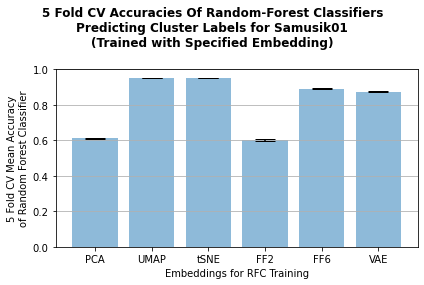

In [19]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, Means, yerr=Errors, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('5 Fold CV Mean Accuracy\nof Random Forest Classifier')
ax.set_xlabel('Embeddings for RFC Training')
ax.set_xticks(x_pos)
ax.set_xticklabels(Methods)
plt.suptitle('5 Fold CV Accuracies Of Random-Forest Classifiers\nPredicting Cluster Labels for Samusik01\n(Trained with Specified Embedding)', fontweight = 'bold')
ax.yaxis.grid(True)
ax.set_ylim([0.0, 1.0])
# Save the figure and show
plt.tight_layout()
plt.savefig('../Figures/RandomForestClassiferAccuracies_s01.png')
plt.show()

# Levine #

In [20]:
import FlowCal

In [21]:
data_dir = "../LevineData/"
levine_fn = data_dir + "Levine_32dim_notransform.fcs"
levine = FlowCal.io.FCSData(levine_fn)

labels = np.array(levine[:, 39])
labels[np.isnan(labels)] = 0
y = labels[labels > 0]

In [22]:
# Load other embeddings
levine_pca = np.load("../Embeddings/levine_pca.npy")
levine_tsne = np.load("../Embeddings/levine_tsne.npy")
levine_umap = np.load("../Embeddings/levine_umap.npy")
levine_2layer = np.load("../Embeddings/levine_2layer.npy")
levine_6layer = np.load("../Embeddings/levine_6layer.npy")
levine_vae = np.load("../Embeddings/levine_vae.npy")

## PCA Accuracy

In [23]:
X_pca = levine_pca[:,0:2]
mean_accs_pca, std_accs_pca = run_crossval(X_pca, np.array(y))

Fold 1: 0.6966453904112876
Fold 2: 0.7079234054806354
Fold 3: 0.7130585017037001
Fold 4: 0.7464606229303643
Fold 5: 0.7514878095603763
Mean Accuracy: 0.7231151460172727
Accuracy SD: 0.02182930308577283


## UMAP Accuracy

In [24]:
X_umap = levine_umap[:,0:2]
mean_accs_umap, std_accs_umap = run_crossval(X_umap, np.array(y))

Fold 1: 0.9805154292844459
Fold 2: 0.9806594039449057
Fold 3: 0.9825310745308826
Fold 4: 0.9841627873494265
Fold 5: 0.9788827030140143
Mean Accuracy: 0.9813502796247351
Accuracy SD: 0.001820312881746991


## tSNE Accuracy

In [25]:
X_tsne = levine_tsne[:,0:2]
mean_accs_tsne, std_accs_tsne = run_crossval(X_tsne, np.array(y))

Fold 1: 0.9784038009310362
Fold 2: 0.9797475644286605
Fold 3: 0.9811393194797715
Fold 4: 0.9823870998704228
Fold 5: 0.9757151084661163
Mean Accuracy: 0.9794785786352016
Accuracy SD: 0.0023068924601118397


## 2 Layer Accuracy

In [26]:
X_2layer = levine_2layer[:,0:2]
mean_accs_2layer, std_accs_2layer = run_crossval(X_2layer, np.array(y))

Fold 1: 0.6919902097230888
Fold 2: 0.6995248836204828
Fold 3: 0.7058117771272256
Fold 4: 0.7337428612564189
Fold 5: 0.742896909195623
Mean Accuracy: 0.714793328184568
Accuracy SD: 0.019913171217345295


## 6 Layer Accuracy

In [27]:
X_6layer = levine_6layer[:,0:2]
mean_accs_6layer, std_accs_6layer = run_crossval(X_6layer, np.array(y))

Fold 1: 0.9365071747372462
Fold 2: 0.9395786341603878
Fold 3: 0.9449056965973989
Fold 4: 0.957191534289965
Fold 5: 0.951766173929737
Mean Accuracy: 0.9459898427429468
Accuracy SD: 0.007629467299285644


## VAE Accuracy

In [28]:
X_vae = levine_vae[:,0:2]
mean_accs_vae, std_accs_vae = run_crossval(X_vae, np.array(y))

Fold 1: 0.9623746220665162
Fold 2: 0.9650141575082786
Fold 3: 0.9669338196477419
Fold 4: 0.972740797619619
Fold 5: 0.9648205029756192
Mean Accuracy: 0.9663767799635549
Accuracy SD: 0.0034959124642383343


In [29]:
# Create lists for the plot
Methods = ['PCA','UMAP', 'tSNE', 'FF2', 'FF6', 'VAE']
x_pos = np.arange(len(Methods))
Means = [mean_accs_pca, mean_accs_umap, mean_accs_tsne, mean_accs_2layer, mean_accs_6layer, mean_accs_vae]
Errors = [std_accs_pca, std_accs_umap, std_accs_tsne, std_accs_2layer, std_accs_6layer, std_accs_vae]

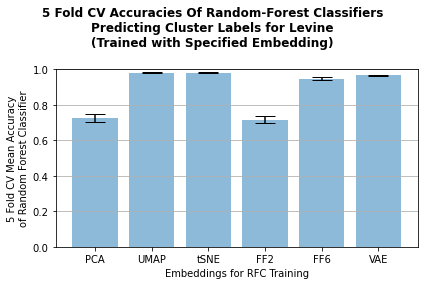

In [30]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, Means, yerr=Errors, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('5 Fold CV Mean Accuracy\nof Random Forest Classifier')
ax.set_xlabel('Embeddings for RFC Training')
ax.set_xticks(x_pos)
ax.set_xticklabels(Methods)
plt.suptitle('5 Fold CV Accuracies Of Random-Forest Classifiers\nPredicting Cluster Labels for Levine\n(Trained with Specified Embedding)', fontweight = 'bold')
ax.yaxis.grid(True)
ax.set_ylim([0.0, 1.0])
# Save the figure and show
plt.tight_layout()
plt.savefig('../Figures/RandomForestClassiferAccuracies_levine.png')
plt.show()